## Draft notebook for DSfB course, analysing a dataset of ecological data on UK plants.

There is a long history of botanical recording on the islands of Britain and Ireland (comprising England, Scotland, Wales, Northern Ireland, Republic of Ireland, Isle of Man and the Channel Islands; Fig. 1, referred to here as ‘BI’), with the earliest systematic records dating back to Sir John Ray in 16901. The Botanical Society of Britain and Ireland (BSBI)2 provides access to large-scale geographic distribution data based on more than 40 million occurrence records, allowing for unique research into changes within the flora, especially throughout the last century.

Henniges, M.C., Powell, R.F., Mian, S. et al. A taxonomic, genetic and ecological data resource for the vascular plants of Britain and Ireland. Sci Data 9, 1 (2022). https://doi.org/10.1038/s41597-021-01104-5

![](sticker.png) 

The vascular flora of Britain and Ireland is among the most extensively studied in the world, but the
current knowledge base is fragmentary, with taxonomic, ecological and genetic information scattered
across different resources. Here we present the first comprehensive data repository of native and alien
species optimized for fast and easy online access for ecological, evolutionary and conservation analyses.
The inventory is based on the most recent reference flora of Britain and Ireland, with taxon names linked to unique Kew taxon identifiers and DNA barcode data. Our data resource for 3,227 species and 26 traits includes existing and unpublished genome sizes, chromosome numbers and life strategy and life-form assessments, along with existing data on functional traits, species distribution metrics, hybrid propensity, associated biomes, realized niche description, native status and geographic origin of alien species. this resource will facilitate both fundamental and applied research and enhance our understanding of the flora’s composition and temporal changes to inform conservation efforts in the face of ongoing climate change and biodiversity loss.

##### Setting up the basic analysis environment

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
np.set_printoptions(precision=5, suppress=True)  # suppress scientific floatation 
sns.set(color_codes=True)
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Download the data

In [2]:
! wget https://data-package.ceh.ac.uk/data/9f097d82-7560-4ed2-af13-604a9110cf6d.zip

--2023-05-01 08:49:55--  https://data-package.ceh.ac.uk/data/9f097d82-7560-4ed2-af13-604a9110cf6d.zip
Resolving data-package.ceh.ac.uk (data-package.ceh.ac.uk)... 192.171.173.198
Connecting to data-package.ceh.ac.uk (data-package.ceh.ac.uk)|192.171.173.198|:443... connected.
HTTP request sent, awaiting response... 200 200
Length: unspecified [application/octet-stream]
Saving to: ‘9f097d82-7560-4ed2-af13-604a9110cf6d.zip’

9f097d82-7560-4ed2-     [   <=>              ] 863.05K  2.05MB/s    in 0.4s    

2023-05-01 08:49:56 (2.05 MB/s) - ‘9f097d82-7560-4ed2-af13-604a9110cf6d.zip’ saved [883767]



Check it's there

In [2]:
! ls

9f097d82-7560-4ed2-af13-604a9110cf6d
9f097d82-7560-4ed2-af13-604a9110cf6d.zip
Old_database
Patterns_in_plantlife-NEW-DB.ipynb
sticker.png


Open up the files

In [4]:
! unzip 9f097d82-7560-4ed2-af13-604a9110cf6d.zip

Archive:  9f097d82-7560-4ed2-af13-604a9110cf6d.zip
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/readme.html  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/database_structure.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/detailed_sources.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/bi_database.docx  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/data/GS_Kew_BI.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/data/BI_main.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/data/GS_BI.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/data/chrom_num_BI.csv  


In [28]:
! ls 9f097d82-7560-4ed2-af13-604a9110cf6d/

data                 readme.html          supporting-documents


In [3]:
! ls 9f097d82-7560-4ed2-af13-604a9110cf6d/data/

BI_main.csv      GS_BI.csv        GS_Kew_BI.csv    chrom_num_BI.csv


. A metadata file (Database_structure.csv) with explanations of the main dataset (BI_main.csv), additional datasets (GS_BI.csv, GS_Kew_BI.csv and chrom_num_BI.csv), and a complete list of all publications and sources used to compile the data (Detailed_sources.csv) are included along with the data. The main database BI_main.csv lists all taxa included in this work along with their identification number (kew_id), associated taxonomic authorities, taxonomic ranks (order, family, genus, subgenus, section, subsection, series, species, group, aggregate), associated trait, distribution, and ecological data. The main database contains a summary of chromosome numbers and the smallest genome size measurement available per species. 
Because more than one chromosome number and genome size measurement has been reported for many species – often reflecting considerable infraspecific variance – these additional chromosome number (chrom_num_BI.csv) and genome size (GS_BI.csv) data are published along with the main dataset as separate files. Detailed information about the newly generated genome size measurements from RBG Kew are summarized in GS_Kew_BI.csv, including information on the calibration standard species and extraction buffers used to estimate the genome size.


#### BI_main.csv  
BI_main.csv lists all taxa included in this work along with their identification number (kew_id), associated taxonomic authorities, taxonomic ranks (order, family, genus, subgenus, section, subsection, series, species, group, aggregate), associated trait, distribution, and ecological data. The main database contains a summary of chromosome numbers and the smallest genome size measurement available per species.


In [5]:
! head 9f097d82-7560-4ed2-af13-604a9110cf6d/data/BI_main.csv

see those "�" - we will have to specific the encoding when reading them in.

#### Chromosome Numbers
Because more than one chromosome number and genome size measurement has been reported for many species – often reflecting considerable infraspecific variance – these additional chromosome number (chrom_num_BI.csv) and genome size (GS_BI.csv) data are published along with the main dataset as separate files.  Detailed information about the newly generated genome size measurements from RBG Kew are summarized in GS_Kew_BI.csv, including information on the calibration standard species and extraction buffers used to estimate the genome size.

In [ ]:
GS_BI.csv

In [ ]:
GS_Kew_BI.csv

In [ ]:
chrom_num_BI.csv

Read the main dataset in 

In [6]:
main = pd.read_csv('9f097d82-7560-4ed2-af13-604a9110cf6d/data/BI_main.csv', encoding='latin-1')

In [7]:
main.head(3)

,kew_id,unclear_species_marker,extinct_species_marker,taxon_name,taxon_name_binom,authors,taxon_name_WCVP,authors_WCVP,order,family,genus,subgenus,section,subsection,series,species,group,aggregate,members_of_agg.,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,imperfect_match_with_Stace_IV,WCVP_URL,POWO_URL,IPNI_URL,accepted_WCVP_URL,StaceIV_nativity,Atlas_nativity_viaALIENATT_PLANTATT,Stace_Crawley_nativity_aliens,SLA,LDMC,seed_mass,leaf_area,mean_veg_height,max_veg_height,L_PLANTATT,F_PLANTATT,R_PLANTATT,N_PLANTATT,S_PLANTATT,L_Doring,F_Doring,R_Doring,N_Doring,S_Doring,T_Doring,ECPE_CSR,predicted_CSR,growth_form,succulence,life_form,biome,origin,TDWG_level_1_code,GB_Man_hectads_post2000,Ire_hectads_post2000,CI_hectads_post2000,GB_Man_hectads_1987_1999,Ire_hectads_1987_1999,CI_hectads_1987_1999,GB_Man_hectads_2000_2009,Ire_hectads_2000_2009,CI_hectads_2000_2009,GB_Man_hectads_2010_2019,Ire_hectads_2010_2019,CI_hectads_2010_2019,hybrid_propensity,scaled_hybrid_propensity,BOLD_link1,BOLD_link2,BOLD_link3,GS_1C_pg,GS_2C_pg,GS_1C_Mbp,GS_2C_Mbp,from_BI_material,data_source,sporophytic_chromosome_number,infraspecific_variation_chrom_number,other_reported_sporophytic_chromosome_number,source_of_other_chrom_num
0,60468511-2,NaN,NaN,Abies alba Mill.,Abies alba,Mill.,Abies alba,Mill.,Pinales,Pinaceae,Abies,NaN,NaN,NaN,NaN,alba,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/60468511-2,http://plantsoftheworldonline.org/taxon/604685...,https://ipni.org/n/60468511-2,NaN,Neo-natd,AN,Neo,7.698508,0.529816,65.612834,255.029158,46.843893,68.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,5.0,NaN,S,Tree,NaN,phanerophyte / tree,NaN,mountains in C Europe,1,382.0,230.0,0.0,230.0,28.0,0.0,120.0,179.0,0.0,303.0,89.0,0.0,NaN,NaN,NaN,NaN,NaN,17.27,34.54,16891.68,33783.36,n,marda et al. 2019,NaN,NaN,24,"marda et al. 2019, Zonneveld, 2019"
1,325658-2,NaN,NaN,Abies amabilis Douglas ex J.Forbes,Abies amabilis,Douglas ex J.Forbes,Abies amabilis,(Douglas ex Loudon) J.Forbes,Pinales,Pinaceae,Abies,NaN,NaN,NaN,NaN,amabilis,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/325658-2,http://plantsoftheworldonline.org/taxon/325658-2,https://ipni.org/n/325658-2,NaN,NaN,NaN,NaN,86.690769,NaN,42.277126,NaN,50.148522,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tree,NaN,phanerophyte / tree,NaN,W N America,7,11.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0,0.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,261486-1,NaN,NaN,Abies cephalonica Loudon,Abies cephalonica,Loudon,Abies cephalonica,Loudon,Pinales,Pinaceae,Abies,NaN,NaN,NaN,NaN,cephalonica,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/261486-1,http://plantsoftheworldonline.org/taxon/261486-1,https://ipni.org/n/261486-1,NaN,Neo-natd,AN,Neo,6.530926,NaN,71.430000,NaN,25.875000,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tree,NaN,phanerophyte / tree,NaN,Greece,1,11.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.14,36.27,17738.00,35476.00,NaN,C-ValueDB,NaN,NaN,NaN,NaN


What's in the dataframe?

In [8]:
main.columns

Index(['kew_id', 'unclear_species_marker', 'extinct_species_marker',
       'taxon_name', 'taxon_name_binom', 'authors', 'taxon_name_WCVP',
       'authors_WCVP', 'order', 'family', 'genus', 'subgenus', 'section',
       'subsection', 'series', 'species', 'group', 'aggregate',
       'members_of_agg.', 'taxonomic_status', 'accepted_kew_id',
       'accepted_name', 'accepted_authors', 'imperfect_match_with_Stace_IV',
       'WCVP_URL', 'POWO_URL', 'IPNI_URL', 'accepted_WCVP_URL',
       'StaceIV_nativity', 'Atlas_nativity_viaALIENATT_PLANTATT',
       'Stace_Crawley_nativity_aliens', 'SLA', 'LDMC', 'seed_mass',
       'leaf_area', 'mean_veg_height', 'max_veg_height', 'L_PLANTATT',
       'F_PLANTATT', 'R_PLANTATT', 'N_PLANTATT', 'S_PLANTATT', 'L_Doring',
       'F_Doring', 'R_Doring', 'N_Doring', 'S_Doring', 'T_Doring', 'ECPE_CSR',
       'predicted_CSR', 'growth_form', 'succulence', 'life_form', 'biome',
       'origin', 'TDWG_level_1_code', 'GB_Man_hectads_post2000',
       'Ire_hecta

Data on what all these things are in is the paper and the supplementary data.

In [34]:
main.dtypes

kew_id                                           object
unclear_species_marker                           object
extinct_species_marker                           object
taxon_name                                       object
taxon_name_binom                                 object
authors                                          object
taxon_name_WCVP                                  object
authors_WCVP                                     object
order                                            object
family                                           object
genus                                            object
subgenus                                         object
section                                          object
subsection                                       object
series                                           object
species                                          object
group                                            object
aggregate                                       

Mixture of floats and objects.  
What data is there?

line 335 is all about the silver birch  

In [11]:
main.iloc[335]

kew_id                                                                                   295174-1
unclear_species_marker                                                                        NaN
extinct_species_marker                                                                        NaN
taxon_name                                                                    Betula pendula Roth
taxon_name_binom                                                                   Betula pendula
authors                                                                                      Roth
taxon_name_WCVP                                                                    Betula pendula
authors_WCVP                                                                                 Roth
order                                                                                     Fagales
family                                                                                 Betulaceae
genus               

What do all the columns mean?  There is a table with data for each trait  9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/database_structure.csv.  Read it in and have a look

In [13]:
trait_key = pd.read_csv('9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/database_structure.csv', encoding='latin-1')

In [14]:
trait_key.head(5)

,Supplemental Table 1. Detailed description of information within the database.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Column,Description,Sources,Summary or possible values,Data coverage,Data coverage natives,Data coverage non-natives
1,BI_main.csv - main table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Taxonomy,kew_id,The Kew identification number associated with ...,"https://wcvp.science.kew.org/, June 2020",,,,
3,NaN,unclear_species_marker,"Marked with ""y"" are species that have a high l...",NaN,"y, NA",,,
4,NaN,extinct_species_marker,"Marked with ""E"" are species that were labelled...","Stace, C. (2019). New Flora of the British Isl...","E, NA",,,


Those first two un-named columns have the trait name and the detailed description in.  It would be very handy to have this to hand in a dictionary.

In [15]:
what_trait = dict(zip(trait_key['Unnamed: 1'], trait_key['Unnamed: 2']))

We can now look up traits to get more detail on them.  We have a value of 0.0 for N_Doring

In [16]:
what_trait['N_Doring']

'Ellenberg indicator values, describing realised niche for soil fertility (termed \x92N\x92, due to focus on nitrogen), determined for central European plants'

Silver birch does not need much Nitrogen

In [17]:
what_trait['L_PLANTATT']

'Ellenberg indicator values, describing realised niche for light, small numbers indicate affinity to low light (deep shade), high numbers bright conditions, determined for British plants'

But it does need plenty of light (value of 7 for this)

How many birch species are in the UK?

In [18]:
Birches = main.loc[main['genus'] =='Betula']

In [56]:
Birches

,kew_id,unclear_species_marker,extinct_species_marker,taxon_name,taxon_name_binom,authors,taxon_name_WCVP,authors_WCVP,order,family,genus,subgenus,section,subsection,series,species,group,aggregate,members_of_agg.,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,imperfect_match_with_Stace_IV,WCVP_URL,POWO_URL,IPNI_URL,accepted_WCVP_URL,StaceIV_nativity,Atlas_nativity_viaALIENATT_PLANTATT,Stace_Crawley_nativity_aliens,SLA,LDMC,seed_mass,leaf_area,mean_veg_height,max_veg_height,L_PLANTATT,F_PLANTATT,R_PLANTATT,N_PLANTATT,S_PLANTATT,L_Doring,F_Doring,R_Doring,N_Doring,S_Doring,T_Doring,ECPE_CSR,predicted_CSR,growth_form,succulence,life_form,biome,origin,TDWG_level_1_code,GB_Man_hectads_post2000,Ire_hectads_post2000,CI_hectads_post2000,GB_Man_hectads_1987_1999,Ire_hectads_1987_1999,CI_hectads_1987_1999,GB_Man_hectads_2000_2009,Ire_hectads_2000_2009,CI_hectads_2000_2009,GB_Man_hectads_2010_2019,Ire_hectads_2010_2019,CI_hectads_2010_2019,hybrid_propensity,scaled_hybrid_propensity,BOLD_link1,BOLD_link2,BOLD_link3,GS_1C_pg,GS_2C_pg,GS_1C_Mbp,GS_2C_Mbp,from_BI_material,data_source,sporophytic_chromosome_number,infraspecific_variation_chrom_number,other_reported_sporophytic_chromosome_number,source_of_other_chrom_num
333,301322-2,NaN,NaN,Betula nana L.,Betula nana,L.,Betula nana,L.,Fagales,Betulaceae,Betula,NaN,NaN,NaN,NaN,nana,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/301322-2,http://plantsoftheworldonline.org/taxon/301322-2,https://ipni.org/n/301322-2,NaN,N,N,NaN,12.226628,0.423113,0.390529,58.708718,0.611679,1.34,7.0,8.0,1.0,1.0,0.0,8.0,9.0,1.0,2.0,0.0,3.0,NaN,S,Shrub,NaN,chamaephyte,Boreo-Arctic Montane,NaN,NaN,99.0,0.0,0.0,76.0,0.0,0.0,61.0,0.0,0.0,86.0,0.0,0.0,1.0,33.333333,https://www.boldsystems.org/index.php/Public_R...,https://www.boldsystems.org/index.php/Public_R...,https://www.boldsystems.org/index.php/Public_R...,0.46,0.91,446.57,893.14,n,marda et al. 2019,28,n,28,"C-ValueDB, marda et al. 2019"
334,32197-2,NaN,NaN,Betula papyrifera Marshall,Betula papyrifera,Marshall,Betula papyrifera,Marshall,Fagales,Betulaceae,Betula,NaN,NaN,NaN,NaN,papyrifera,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/32197-2,http://plantsoftheworldonline.org/taxon/32197-2,https://ipni.org/n/32197-2,NaN,Neo-surv,AN,Neo-surv,21.440503,NaN,0.363380,3442.076526,5.972027,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tree,NaN,phanerophyte / tree,NaN,N America,7,80.0,3.0,0.0,7.0,0.0,1.0,17.0,3.0,0.0,65.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.47,2.94,1441.00,2881.00,n,C-ValueDB,NaN,NaN,84,C-ValueDB
335,295174-1,NaN,NaN,Betula pendula Roth,Betula pendula,Roth,Betula pendula,Roth,Fagales,Betulaceae,Betula,NaN,NaN,NaN,NaN,pendula,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/295174-1,http://plantsoftheworldonline.org/taxon/295174-1,https://ipni.org/n/295174-1,NaN,N,N,NaN,16.312864,0.367958,0.403996,1429.484263,1.924403,30.00,7.0,5.0,4.0,4.0,0.0,7.0,NaN,NaN,NaN,0.0,NaN,NaN,S/CSR,Tree,NaN,phanerophyte / tree,Boreo-Temperate,NaN,NaN,2292.0,483.0,8.0,2160.0,268.0,8.0,1891.0,268.0,4.0,2203.0,346.0,7.0,1.0,33.333333,https://www.boldsystems.org/index.php/Public_R...,https://www.boldsystems.org/index.php/Public_R...,https://www.boldsystems.org/index.php/Public_R...,0.41,0.81,397.89,795.77,n,marda et al. 2019,28 (mode),m,28,"marda et al. 2019, Zonneveld, 2019"
336,295185-1,NaN,NaN,Betula pubescens Ehrh.,Betula pubescens,Ehrh.,Betula pubescens,Ehrh.,Fagales,Betulaceae,Betula,NaN,NaN,NaN,NaN,pubescens,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/295185-1,http://plantsoftheworldonline.org/taxon/295185-1,https://ipni.org/n/295185-1,NaN,N,N,NaN,24.687919,0.357172,0.227745,1295.987143,3.894682,30.00,7.0,7.0,4.0,4.0,0.0,7.0,8.0,3.0,3.0,0.0,NaN,NaN,S/CSR,Herb,NaN,phanerophyte / tree,Boreo-Temperate,NaN,NaN,2415.0,871.0,2.0,2279.0,734.0,3.0,1924.0,691.0,2.0,2321.0,818.0,1.0,2.0,66.666667,https://www.boldsystems.org/index.php/Public_R...,https://www.

Which needs the most light?

<AxesSubplot:xlabel='taxon_name', ylabel='L_PLANTATT'>

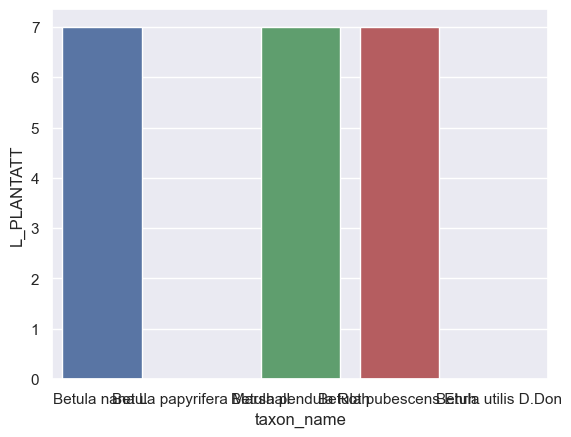

In [19]:
sns.barplot(data=Birches, x="taxon_name", y="L_PLANTATT")

Tidy, using matplotlib to rotate the x axis lables

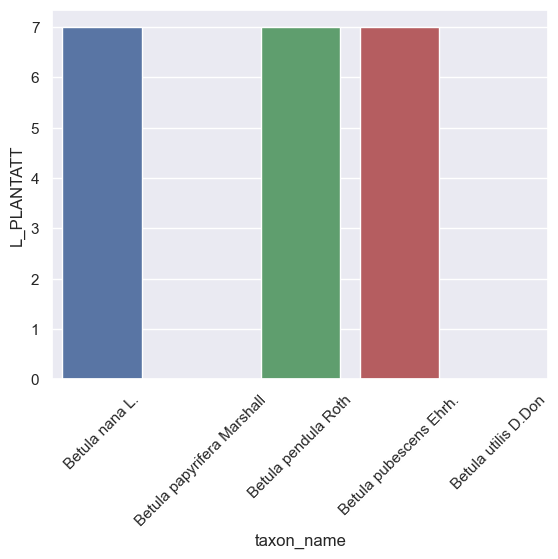

In [20]:
ax = sns.barplot(data=Birches, x="taxon_name", y="L_PLANTATT")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

The three we have data for all need lots of light.

Which needs the most nitrogen?

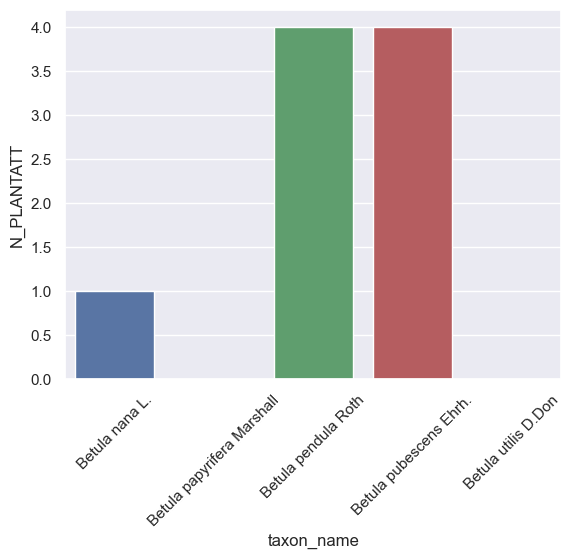

In [21]:
ax = sns.barplot(data=Birches, x="taxon_name", y="N_PLANTATT")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Of the three with data, the dwarf birch needs the least nitrogen

### How much data for each trait is there?  

In [22]:
main.describe()

,SLA,LDMC,seed_mass,leaf_area,mean_veg_height,max_veg_height,L_PLANTATT,F_PLANTATT,R_PLANTATT,N_PLANTATT,S_PLANTATT,L_Doring,F_Doring,R_Doring,N_Doring,S_Doring,T_Doring,GB_Man_hectads_post2000,Ire_hectads_post2000,CI_hectads_post2000,GB_Man_hectads_1987_1999,Ire_hectads_1987_1999,CI_hectads_1987_1999,GB_Man_hectads_2000_2009,Ire_hectads_2000_2009,CI_hectads_2000_2009,GB_Man_hectads_2010_2019,Ire_hectads_2010_2019,CI_hectads_2010_2019,hybrid_propensity,scaled_hybrid_propensity,GS_1C_pg,GS_2C_pg,GS_1C_Mbp,GS_2C_Mbp
count,1795.000000,1514.000000,2174.000000,1645.000000,2415.000000,2415.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1930.000000,1892.000000,1770.000000,1866.000000,1940.000000,859.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,642.000000,642.000000,2117.000000,2117.000000,2117.000000,2117.000000
mean,24.458285,0.223418,59.096989,4009.606261,2.102329,3.847599,7.107926,5.842608,6.219786,4.386172,0.377178,7.069430,5.755285,6.261017,4.436227,0.375258,5.777648,473.369649,113.770288,2.272204,407.863259,93.054633,2.346006,328.500958,63.913738,1.047284,419.271565,100.265495,2.068051,2.397196,42.013584,3.398512,6.795399,3325.720590,6651.383094
std,13.488401,0.090310,704.762068,12366.361655,6.098995,11.181341,1.293594,2.271248,1.507959,1.913439,1.159378,1.416905,2.304400,1.718027,2.054866,1.217208,1.310941,726.787427,241.043356,3.963886,682.351300,213.908162,4.153351,571.379956,154.230136,2.012029,682.070603,223.639294,3.790052,2.466536,51.143780,5.976192,11.952843,5850.077661,11700.150135
min,0.508000,0.044381,0.000900,0.188000,0.001000,0.001000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.080000,0.160000,81.000000,163.000000
25%,16.105139,0.156164,0.300017,213.709730,0.227564,0.450000,7.000000,4.000000,5.000000,3.000000,0.000000,6.000000,4.000000,5.000000,3.000000,0.000000,5.000000,8.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,4.761905,0.600000,1.200000,586.110000,1172.230000
50%,22.450000,0.210762,1.240360,922.416111,0.435937,0.800000,7.000000,5.000000,7.000000,5.000000,0.000000,7.000000,5.000000,7.000000,4.000000,0.000000,6.000000,85.500000,2.000000,0.000000,43.000000,0.000000,0.000000,37.000000,1.000000,0.000000,64.000000,1.000000,0.000000,1.000000,20.000000,1.210000,2.420000,1181.570000,2363.140000
75%,29.492500,0.279042,5.211056,2843.000000,0.893317,1.500000,8.000000,7.000000,7.000000,6.000000,0.000000,8.000000,7.000000,7.000000,6.000000,0.000000,7.000000,646.750000,70.750000,3.000000,494.750000,36.000000,3.000000,370.500000,30.000000,1.000000,517.000000,54.750000,2.000000,3.000000,100.000000,3.210000,6.410000,3136.000000,6272.000000
max,207.782755,0.678366,23993.875000,180611.540800,76.299818,120.000000,9.000000,12.000000,9.000000,9.000000,9.000000,9.000000,12.000000,9.000000,9.000000,9.000000,9.000000,2819.000000,1006.000000,14.000000,2786.000000,971.000000,15.000000,2590.000000,880.000000,10.000000,2799.000000,1002.000000,14.000000,15.000000,700.000000,88.900000,177.800000,86943.960000,173887.930000


Wide range - all have species occurrence range characteristics (whatever these are), very few have infomation on bud physical defence and root hairs.

In [ ]:
LOTS of questions.

In [ ]:
Is leaf area or SLA (see below) related to light requirement?

In [71]:
what_trait['SLA']

'Specific Leaf Area (total leaf area per total leaf dry mass) in mm2 mg-1, mean value taken from publicly available data from TRY database'

In [72]:
what_trait['leaf_area']

'Leaf area in mm2, mean value taken from publicly available data from TRY database'

<AxesSubplot:xlabel='leaf_area', ylabel='L_PLANTATT'>

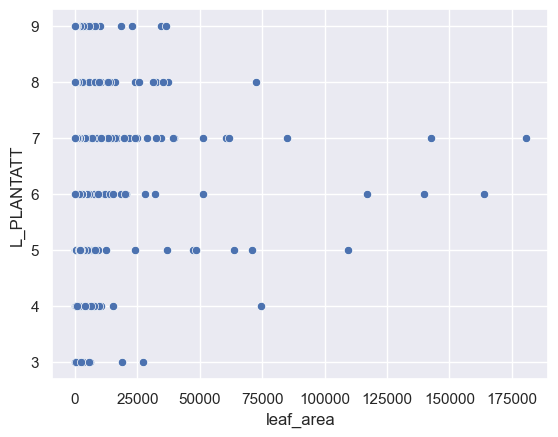

In [73]:
sns.scatterplot(data=main, x="leaf_area", y="L_PLANTATT")

<AxesSubplot:xlabel='SLA', ylabel='L_PLANTATT'>

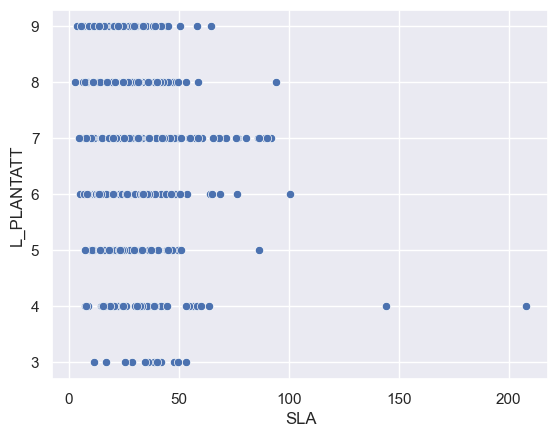

In [74]:
sns.scatterplot(data=main, x="SLA", y="L_PLANTATT")

Weak effect of dimmer enviroments having smaller, thicker leaves?  This does not look the best way to plot it.

In [ ]:
There are two measure for light requirements

In [75]:
what_trait['L_Doring']

'Ellenberg indicator values, describing realised niche for light, determined for central European plants'

In [76]:
what_trait['L_PLANTATT']

'Ellenberg indicator values, describing realised niche for light, small numbers indicate affinity to low light (deep shade), high numbers bright conditions, determined for British plants'

L_PLANTATT looks a better measure where available.  
Could you make a new column with L_PLANTATT where it exisits (1779 measures), but L_Doring (1930 measures) where it doesn't?  How many species are covered then?  Do you see the same realationship?  It this realtionship stronger for herbs than for trees?  For perrentials or annuals?

### What do you want to know about UK flowering plants? 

### More data

If you need even more, you can gather more infomation on the UK fora from the Try database and ecoflora.  You will have to be careful when merging datasets as they have very different structures to the first dataset.

There is lots of trait data from the global leaf traits database (https://www.try-db.org/TryWeb/Home.php)  I have a selction of it here:
../Data_sets/Global_leaf_traits.txt

http://ecoflora.org.uk/
The Ecological Flora of the British Isles is a database constructed from a wide variety of sources by Dr Helen Peat and Professor Alastair Fitter at the University of York, with financial support from the British Ecological Society and the Natural Environment Research Council. It consists of data on 3842 species of higher plants that occur in the British Isles (of which some 2000 species including all the British Natives and many common introductions have ecological traits entered), together with the bibliography of sources. This version has been produced by Dr Henry Ford.

The data comprises information on taxonomy (family, genus, specific name, authority, and vernacular name, together with common synonyms), a suite of over 130 ecological and morphological characteristics, vice-county distribution in Britain, European distribution by country, mycorrhizal associations, associated phytophagous insects and fungi. The data are obtained from the literature and the coverage varies greatly between species. The data set is therefore incomplete"

I have downloaded the data for you here:
../Data_sets/EcoFlora.txt